# Analyse over Wijn


## onderzoeksvragen
- In hoeverre is de score van een Portugese Red te voorspellen op basis van de chemische kenmerken?  
- Zijn de wijnen die met een hoge score beoordeeld zijn duurder dan wijnen met een lagere score?
- In hoeverre kan op basis van de chemische kenmerken voorspelt worden of het een witte of rode wijn is?
- Welke kernwoorden zijn typerend voor een hoog scorende wijn?  

Wij zullen deze onderzoeksvragen zo goed mogelijk proberen te beantwoorden.
Voor de beantwoording van deze vragen maken wij gebruik van het Data Science proces.  
Dit proces ziet er als volgt uit:
### Het data science proces
1. Data collection
2. Data processing
3. Data cleaning
4. Data exploration & analysis
5. Model building
6. Visualization
7. Communication


Allereerst zullen we de benodigde libraries importeren.
Deze libraries zullen we gebruiken voor het analyseren en het visualiseren van de data.

In [1]:
# data analysis libraries 
import numpy as np
import pandas as pd

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns


## Data Collection
De eerste dataset die we gaan gebruiken is aan ons aangeleverd. De dataset is een csv bestand en heet: 'redwine.csv'. In de dataset staat informatie en chemische kenmerken van wijnen in Portugal. 

Allereerst beginnen we met het importeren van de dataset en kijken we of de dataset correct is geïmporteerd door de eerste 5 regels op te vragen.

In [2]:
# import the data files
df_red_wine = pd.read_csv("data/redwine.csv", sep=";")
df_red_wine.head()

,id,country,description,designation,points,price,province,taster_name,title,variety,...,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Kerin O’Keefe,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,...,0.29,0.4,2.9,0.098,10.0,26.0,10.006,3.48,0.91,9.7
1,2,Portugal,"From an estate in the south of the Alentejo, t...",Grande Reserva Tinto,91,26.0,Alentejano,Roger Voss,Casa Santa Vitória 2013 Grande Reserva Tinto R...,Portuguese Red,...,0.26,0.37,1.4,0.076,8.0,23.0,0.9974,3.26,0.70,9.6
2,3,Portugal,A year in wood and 30 months in bottle before ...,Montes Claros Garrafeira,90,28.0,Alentejo,Paul Gregutt,Adega Cooperativa de Borba 2012 Montes Claros ...,Portuguese Red,...,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3
3,4,Portugal,Wood aging gives this ripe blend of Baga and T...,NaN,90,20.0,Beira Atlantico,Alexander Peartree,Quinta de Foz de Arouce 2013 Red (Beira Atlant...,Portuguese Red,...,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3
4,5,Portugal,"A powerful wine, richly structured and full of...",Gerações Colheita Seleccionada,92,34.0,Alentejano,Paul Gregutt,Herdade Grande 2010 Gerações Colheita Seleccio...,Portuguese Red,...,0.48,0.34,2.2,0.073,16.0,25.0,0.9936,3.28,0.66,12.4


### externe dataset
Aangezien onze eerste dataset alleen maar kenmerken van rode wijn bevat zijn wij gaan zoeken naar een dataset met kenmerken van witte wijn.  
  
De dataset komt van de volgende website: https://archive.ics.uci.edu/ml/datasets/wine+quality  
  
Ook deze dataset gaan we importeren om hierna te controleren of hij goed geïmporteerd is.

In [3]:
df_white_wine = pd.read_csv("data/winequality-white.csv", sep=";")
df_white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Data Processing
Aangezien de bestanden met de data al in een csv bestand staan kunnen deze direct in een dataframe worden ingelezen.  
Nu is het nog aan ons om te beslissen of er nog kolomnamen zijn die aangepast moeten worden en welke kolommen we gaan droppen.  
In totaal heeft deze dataset 22 kolommen. Om uit te zoeken welke kolommen essentieel zijn voor het verdere proces gaan we nu eerste kijken hoe de kolommen heten.

In [4]:
df_red_wine.columns

Index(['id', 'country', 'description', 'designation', 'points', 'price',
       'province', 'taster_name', 'title', 'variety', 'winery',
       'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

Om goed te kunnen begrijpen met welke data we hier mee te maken hebben is hieronder voor iedere kolom de betekenis van de data die erin staat gegeven.  

- **id**  
    Een uniek nummer voor iedere rij
- **Country**  
    Het land waar de wijn vandaan komt
- **Description**  
    De beschrijving van de wijn
- **Designation**  
    De wijngaard waar tenminste 85% van de druiven vandaan komen
- **Points**  
    De hoeveelheid punten die de wijn heeft gekregen van de proever
- **Price**  
    De prijs van de wijn
- **Province**  
    De provincie waar de wijn
- **Taster_name**  
    De volledige naam van de proever
- **Title**  
    De titel die normaliter op het wijnetiket staat
- **Variety**  
    Het type druif dat gebruikt wordt
- **Winery**  
    Het bedrijf waar de wijn geproduceerd is
- **Fixed acidity**  
    
- **Volatile acidity**  
    
- **Citric acid**  
    
- **Residual sugar**  
    
- **Chlorides**  
    De hoeveelheid zout in de wijn
- **Free sulfur dioxide**  
    Zwaveldioxide wordt in de wijn toegevoegd tijdens het proces genaamd "vinificatie".
    De hoeveelheid zwaveldioxide dat vrij in de wijn zit. (Wat dus niet gebonden is aan andere chemicaliën in de wijn)
    De zwavel voorkomt oxidatie van de wijn en wordt als conserveringsmiddel in veel levensmiddelen gebruikt.
    Zwaveldioxide wat niet vrij is, en dus al gebonden is aan andere stoffen in de wijn, heeft geen antioxiderende werking meer.
- **Total sulfur dioxide**  
    De hoeveelheid totale zwaveldioxide dat in de wijn zit.
    Een te hoge concentratie zwaveldioxide kan de smaak verpesten.
    Een te lage concentratie zwaveldioxide kan ervoor zorgen dat er teveel bacterien in de wijn blijven zitten waardoor het gevaarlijk kan zijn om te drinken.
- **Density**  
    
- **pH**  
    Is een maat voor de zuurgraad van een waterige oplossing. De schaal gaat van 0 (zuur) tot 14 (basisch). De meeste wijnen zitten tussen de 2.8 en de 4.0
- **Sulphates (sulfites)**  
    
- **Alcohol**  
    Het percentage alcohol in de wijn

Voor het uitzoeken van de betekenis van deze termen/kolommen zijn de volgende bronnen gebruikt:  
- https://www.gall.nl/ontdek/wijn/de-zuurgraad-van-wijn/
- https://winecompliancealliance.com/vinyard-designation-on-a-wine-label/
- http://rstudio-pubs-static.s3.amazonaws.com/80458_5000e31f84df449099a872ccf40747b7.html


Bij deze dataset hebben we al de voorkennis dat al deze wijnen uit Portugal komen. Hierdoor hoeven we de kolom 'country' niet te gebruiken. Verder geeft 'variety' aan met wat voor druif we te maken hebben, waarschijnlijk zal dit ook maar één unieke waarde hebben.  
Voordat we deze kolommen weggooien checken we nog voor de zekerheid of onze aannames kloppen. 

In [5]:
df_red_wine['country'].unique()

array(['Portugal'], dtype=object)

In [6]:
df_red_wine['variety'].unique()

array(['Portuguese Red'], dtype=object)

Onze aannames blijken te kloppen. We hebben hier twee keer te maken met een kolom met maar één unieke waarde. Deze kolommen kunnen dus gedropt worden.

In [7]:
df_red_wine.drop(['country', 'variety'], axis=1, inplace=True)

Op basis van onze onderzoeksvragen kunnen we ook de kolommen 'Designation', 'winery' en 'Province' laten vallen. Dit omdat we voor de beantwoording van onze onderzoeksvragen geen onderscheid hoeven te maken tussen de verschillende provincies of de wijngaarden waar de wijn vandaan kan komen.

In [8]:
df_red_wine.drop(['designation', 'province', 'winery'], axis=1, inplace=True)

Verder maken we van de kolom 'id' de index

In [9]:
df_red_wine.set_index('id', inplace=True)
df_red_wine.head()

,description,points,price,taster_name,title,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
id,,,,,,,,,,,,,,,,
1,"This is ripe and fruity, a wine that is smooth...",87,15.0,Kerin O’Keefe,Quinta dos Avidagos 2011 Avidagos Red (Douro),10.0,0.29,0.4,2.9,0.098,10.0,26.0,10.006,3.48,0.91,9.7
2,"From an estate in the south of the Alentejo, t...",91,26.0,Roger Voss,Casa Santa Vitória 2013 Grande Reserva Tinto R...,8.3,0.26,0.37,1.4,0.076,8.0,23.0,0.9974,3.26,0.70,9.6
3,A year in wood and 30 months in bottle before ...,90,28.0,Paul Gregutt,Adega Cooperativa de Borba 2012 Montes Claros ...,7.0,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3
4,Wood aging gives this ripe blend of Baga and T...,90,20.0,Alexander Peartree,Quinta de Foz de Arouce 2013 Red (Beira Atlant...,7.0,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3
5,"A powerful wine, richly structured and full of...",92,34.0,Paul Gregutt,Herdade Grande 2010 Gerações Colheita Seleccio...,8.0,0.48,0.34,2.2,0.073,16.0,25.0,0.9936,3.28,0.66,12.4


## Data cleaning
Nu de data bewerkt is kunnen we tot de volgende stap overgaan: het opschonen van de data. Hierbij gaan we op zoek naar missende en dubbele waarden, outliers en onvolkomenheden.  
Allereerst gaan we opzoek naar rijen waar waarden missen.

In [10]:
len(df_red_wine)

2465

In [11]:
pd.isnull(df_red_wine).sum()

description               0
points                    0
price                   269
taster_name               0
title                     0
fixed acidity             0
volatile acidity          0
citric acid               0
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
dtype: int64

Hier zien we dat er 269 missende waarden zijn en dat die waarden zich allemaal in de 'price' kolom bevinden. Deze waarde hebben we echter wel voor één van de onderzoeksvragen. Hier hebben wij de afweging gemaakt om deze waarden te verwijderen.  
Deze keuze is gebaseerd op het feit dat we nu ongeveer 12% van de data weggooien en we dus nog genoeg data behouden om te onderzoeken of er een relatie zit tussen de prijs en de hoeveelheid punten van een fles wijn.  
We droppen dus alle rijen met missende waardes en tegelijkertijd verwijderen we duplicate rijen.

In [12]:
# deleting the rows with empty values
df_red_wine.dropna(inplace=True)
# deleting the duplicates rows
df_red_wine.drop_duplicates(inplace=True)

chemische kenmerken filteren!!!!!!!!

## Data Exploration

In [13]:
df_red_wine.describe()

,points,price,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates
count,2196.000000,2196.000000,2196.000000,2196.000000,2196.000000,2196.000000,2196.000000,2196.000000,2196.000000,2196.000000
mean,88.864299,24.819217,8.347040,0.530089,2.575592,0.087842,15.953097,47.468124,3.311557,0.663201
std,2.997764,25.539475,1.751835,0.179942,1.438245,0.047686,10.446069,33.304164,0.155462,0.174591
min,81.000000,5.000000,4.600000,0.120000,0.900000,0.012000,1.000000,6.000000,2.740000,0.330000
25%,87.000000,12.000000,7.100000,0.400000,1.900000,0.070000,7.750000,22.000000,3.210000,0.550000
50%,88.000000,17.000000,7.900000,0.520000,2.200000,0.079000,14.000000,38.000000,3.310000,0.620000
75%,91.000000,28.000000,9.300000,0.640000,2.600000,0.090000,21.250000,64.000000,3.400000,0.730000
max,100.000000,450.000000,15.900000,1.580000,15.500000,0.611000,72.000000,289.000000,4.010000,2.000000


Wat uitleg over bovenstaande tabel

### De wijnproevers
Aangezien we met wijnproevers te maken hebben is alle data over de punten die aan een wijn toegedeeld zijn subjectief. Allereerst willen we wat inzicht krijgen over het gedrag van deze groep bij de toekenning van de punten.  
  
Eerst gaan we kijken met hoeveel wijnproevers we in totaal te maken hebben.

In [14]:
len(df_red_wine['taster_name'].unique())

18

We hebben dus met 18 verschillende wijnproevers te maken.  
Hierna gaan we kijken of de frequenties van de beoordelingen van de wijnproevers gelijk verdeeld zijn.

In [15]:
df_red_wine['taster_name'].value_counts()

Roger Voss            572
Michael Schachner     334
Kerin O’Keefe         231
Paul Gregutt          199
Virginie Boone        191
Joe Czerwinski        127
Matt Kettmann         123
Sean P. Sullivan      107
Jim Gordon             97
Anna Lee C. Iijima     74
Anne Krebiehl MW       49
Lauren Buzzeo          34
Susan Kostrzewa        25
Alexander Peartree     14
Jeff Jenssen            9
Mike DeSimone           4
Fiona Adams             3
Carrie Dykes            3
Name: taster_name, dtype: int64

Uit de bovenstaande tabel valt te zien dat de frequenties van de beoordelingen niet evenredig verdeeld zijn. Zo valt te zien dat sommige proevers zeer veel beoordelingen hebben gegeven terwijl andere veel minder hebben gegeven.  
  
Hierna willen we graag weten wat de minimale, maximale en gemiddelde score is per proever.

In [16]:
# prepare the data_frame
df_taster_index = df_red_wine.copy()
df_taster_index = df_taster_index[['taster_name', 'points']]
df_taster_index.set_index('taster_name', inplace=True)

# getting the min, max and average per taster
taster_avg = df_taster_index.groupby('taster_name').mean()
taster_min = np.min(df_taster_index.groupby('taster_name'))
taster_max = np.max(df_taster_index.groupby('taster_name'))

# building a new dataframe with all the info per taster
df_taster_stats = pd.concat([taster_min, taster_max, taster_avg], axis=1)
df_taster_stats.columns = ['min points', 'max points', 'avg points']
df_taster_stats

,min points,max points,avg points
taster_name,,,
Alexander Peartree,82,95,88.500000
Anna Lee C. Iijima,83,95,88.878378
Anne Krebiehl MW,83,94,88.020408
Carrie Dykes,83,88,85.333333
Fiona Adams,85,91,88.666667
Jeff Jenssen,82,92,87.111111
Jim Gordon,82,95,88.701031
Joe Czerwinski,84,94,88.637795
Kerin O’Keefe,81,96,88.770563


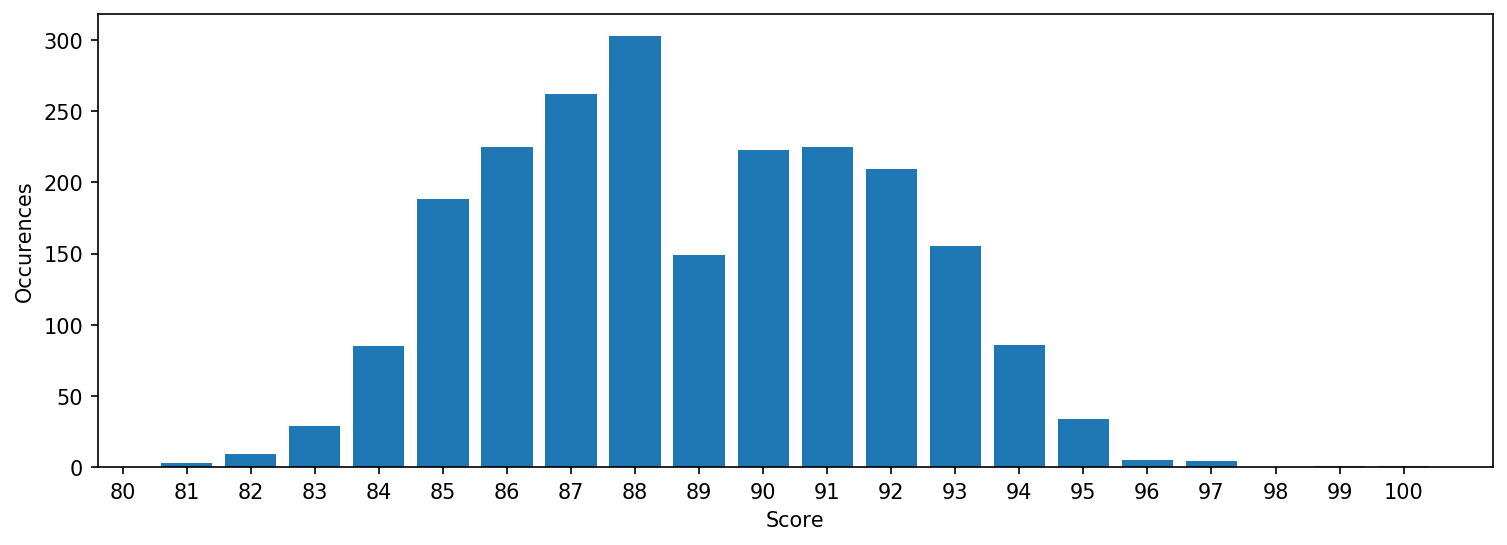

In [17]:
data = df_red_wine['points'].value_counts().sort_index()

fix, ax = plt.subplots(figsize=(12,4), dpi=150)

ax.bar(data.index, data)
plt.xticks([n for n in range(80, 101, 1)])
plt.ylabel('Occurences');
plt.xlabel('Score');
plt.show()

<h3>Gemiddelde afwijking van de gegeven scores per proever</h3>

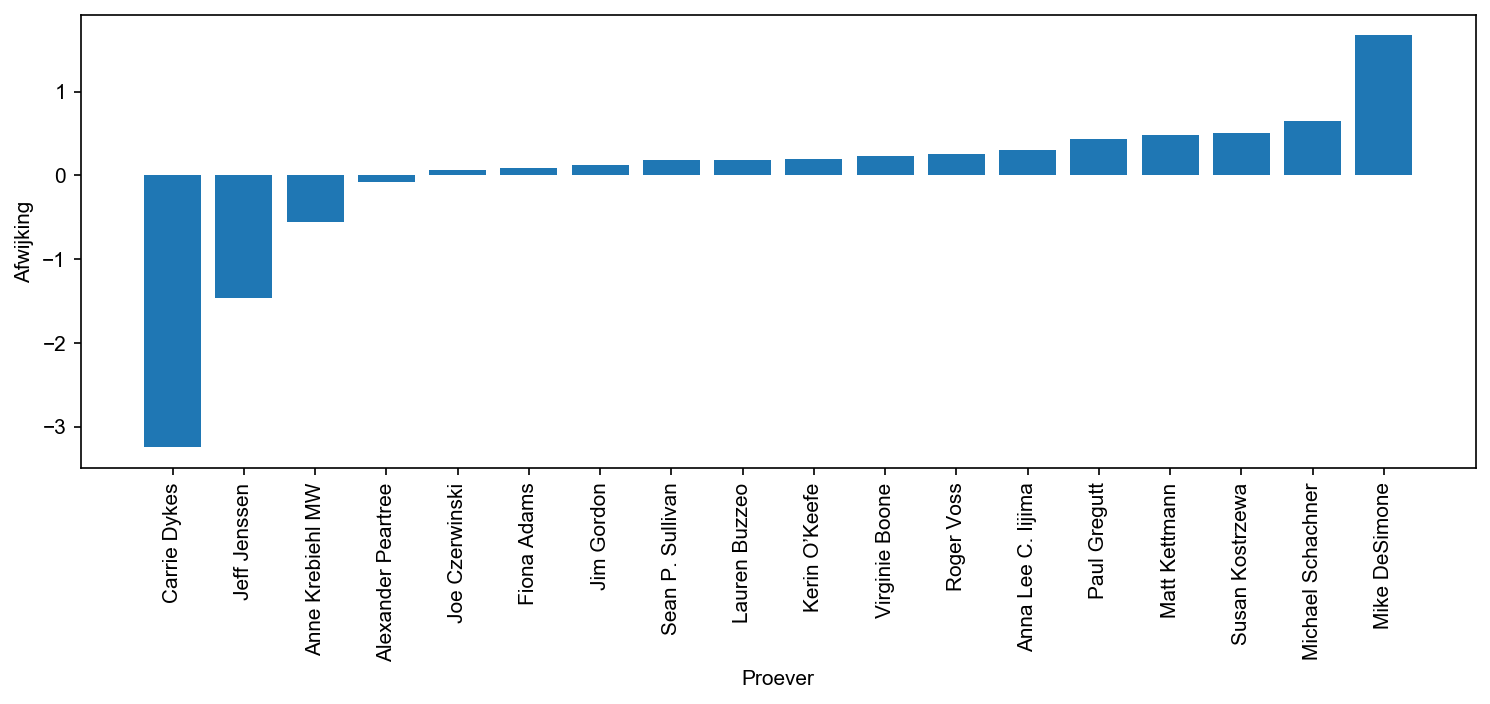

In [18]:
# Gemiddelde punten
ave = df_taster_stats.mean()['avg points']

# Standaard deviatie per wijnproever
a = df_taster_stats['avg points'] - ave

# Barchart afwijking
fix, ax = plt.subplots(figsize=(12,4), dpi=150)
a = a.sort_values()
ax.bar(a.index, a)
plt.ylabel('Afwijking');
plt.xlabel('Proever');
plt.xticks(rotation=90)
sns.set_style('whitegrid')
plt.show()

Hierboven zie je de gemiddelde afwijking van punten gegeven door elke proever. Dit kan later gebruikt worden voor de normalisatie zodat elke proever gemiddeld dezelfde score geeft.

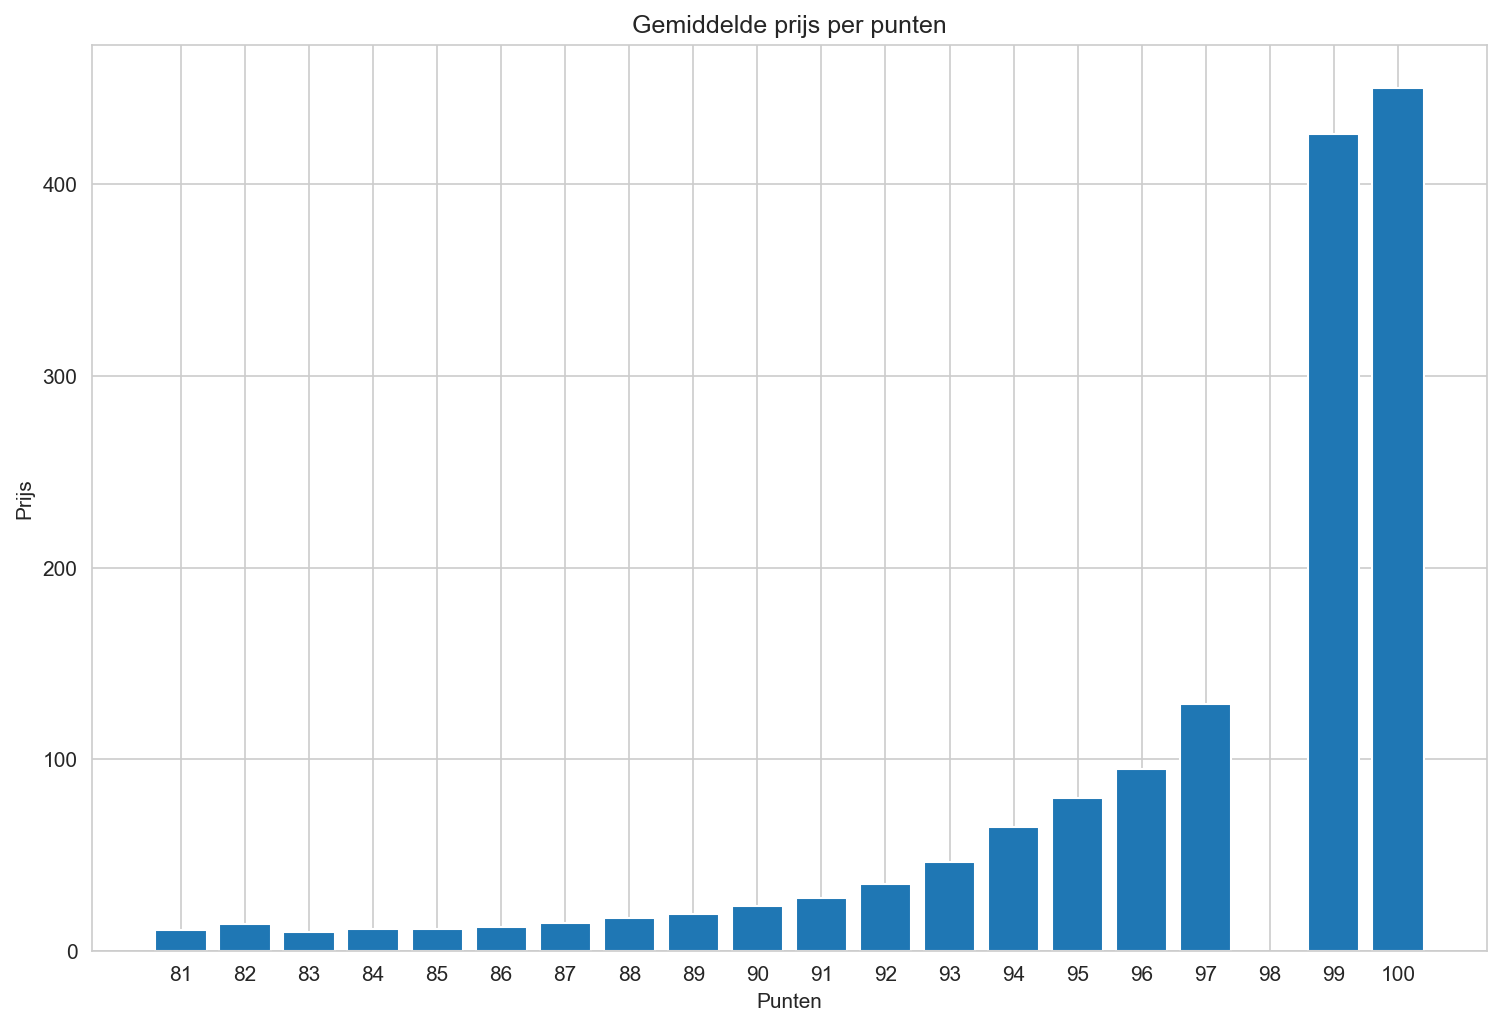

In [19]:
data = df_red_wine[['points','price']]
data = data.groupby('points').mean()

fix, ax = plt.subplots(figsize=(12,8), dpi=150)

ax.bar(data.index, data['price'])
plt.xticks([n for n in range(81, 101, 1)])
plt.title("Gemiddelde prijs per punten")
plt.ylabel('Prijs');
plt.xlabel('Punten');
plt.show()

Er is een duidelijke correlatie tussen prijs en punten zoals hierboven weergegeven.

# Normalisatie
Hier gaan we probereren het verschil tussen proevers zoveel mogelijk te normaliseren zodat het gemiddelde van alle proevers zo gelijk mogelijk is.

In [72]:
average = df_red_wine.points.mean()
print('Gemiddelde score van alle wijn: ',average)

Gemiddelde score van alle wijn:  88.86429872495447


Hieronder zie je het gemiddelde verschil van het gemiddelde per proever

In [21]:
deviation = (df_taster_stats['avg points'] - average)
deviation.sort_values()

taster_name
Carrie Dykes         -3.530965
Jeff Jenssen         -1.753188
Anne Krebiehl MW     -0.843891
Alexander Peartree   -0.364299
Joe Czerwinski       -0.226503
Fiona Adams          -0.197632
Jim Gordon           -0.163268
Sean P. Sullivan     -0.107289
Lauren Buzzeo        -0.099593
Kerin O’Keefe        -0.093736
Virginie Boone       -0.058016
Roger Voss           -0.035627
Anna Lee C. Iijima    0.014080
Paul Gregutt          0.145752
Matt Kettmann         0.200742
Susan Kostrzewa       0.215701
Michael Schachner     0.360252
Mike DeSimone         1.385701
Name: avg points, dtype: float64

In [22]:
df_red_wine_deviated = df_red_wine.copy()
for index, row in df_red_wine.iterrows():
    dev = deviation[df_red_wine_deviated.loc[index,'taster_name']]
    df_red_wine_deviated.loc[index,'points']=row['points']-round(dev)
df_red_wine_deviated['points'].mean()

88.89845173041894

Het verschil is niet heel groot namelijk ~0.03

In [23]:
# prepare the data_frame
df_taster_index = df_red_wine_deviated.copy()
df_taster_index = df_taster_index[['taster_name', 'points']]
df_taster_index.set_index('taster_name', inplace=True)

# getting the min, max and average per taster
taster_avg = df_taster_index.groupby('taster_name').mean()
taster_min = np.min(df_taster_index.groupby('taster_name'))
taster_max = np.max(df_taster_index.groupby('taster_name'))

# building a new dataframe with all the info per taster
df_taster_stats_deviated = pd.concat([taster_min, taster_max, taster_avg], axis=1)
df_taster_stats_deviated.columns = ['min points', 'max points', 'avg points']

Hieronder zie je een grafiek met het effect van de normalisatie. Het had eventueel nog beter gekund als ik de punten als float had gebruikt, maar het effect leek mij minimaal.

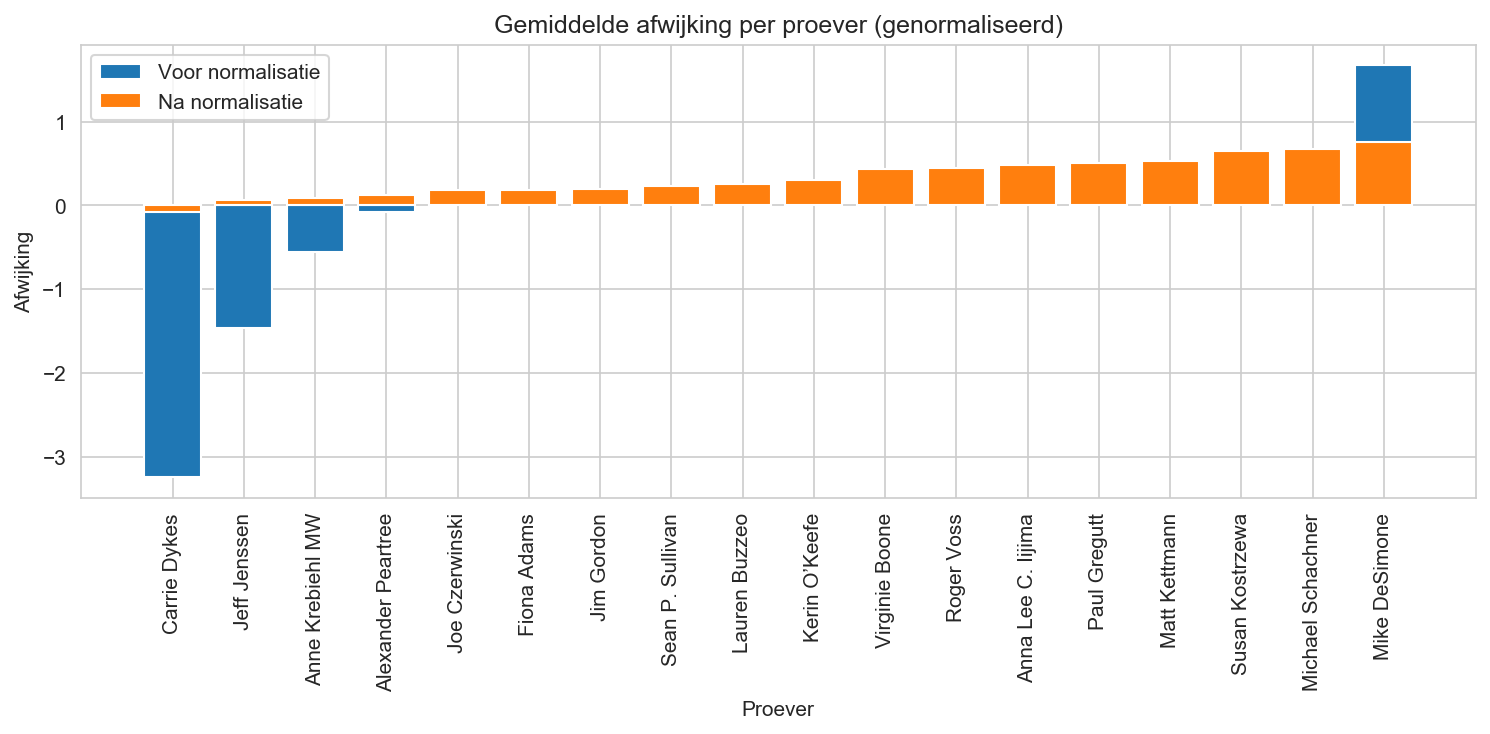

In [38]:
# Standaard deviatie per wijnproever
b = df_taster_stats_deviated['avg points'] - ave

# Barchart afwijking
fix, ax = plt.subplots(figsize=(12,4), dpi=150)
b = b.sort_values()

p1 = ax.bar(a.index, a,label='Voor normalisatie')
p2 = ax.bar(a.index, b,label='Na normalisatie')

plt.ylabel('Afwijking');
plt.xlabel('Proever');
plt.title("Gemiddelde afwijking per proever (genormaliseerd)")
plt.legend()
plt.xticks(rotation=90)
sns.set_style('whitegrid')
plt.show()

De genormaliseerde grafiek:

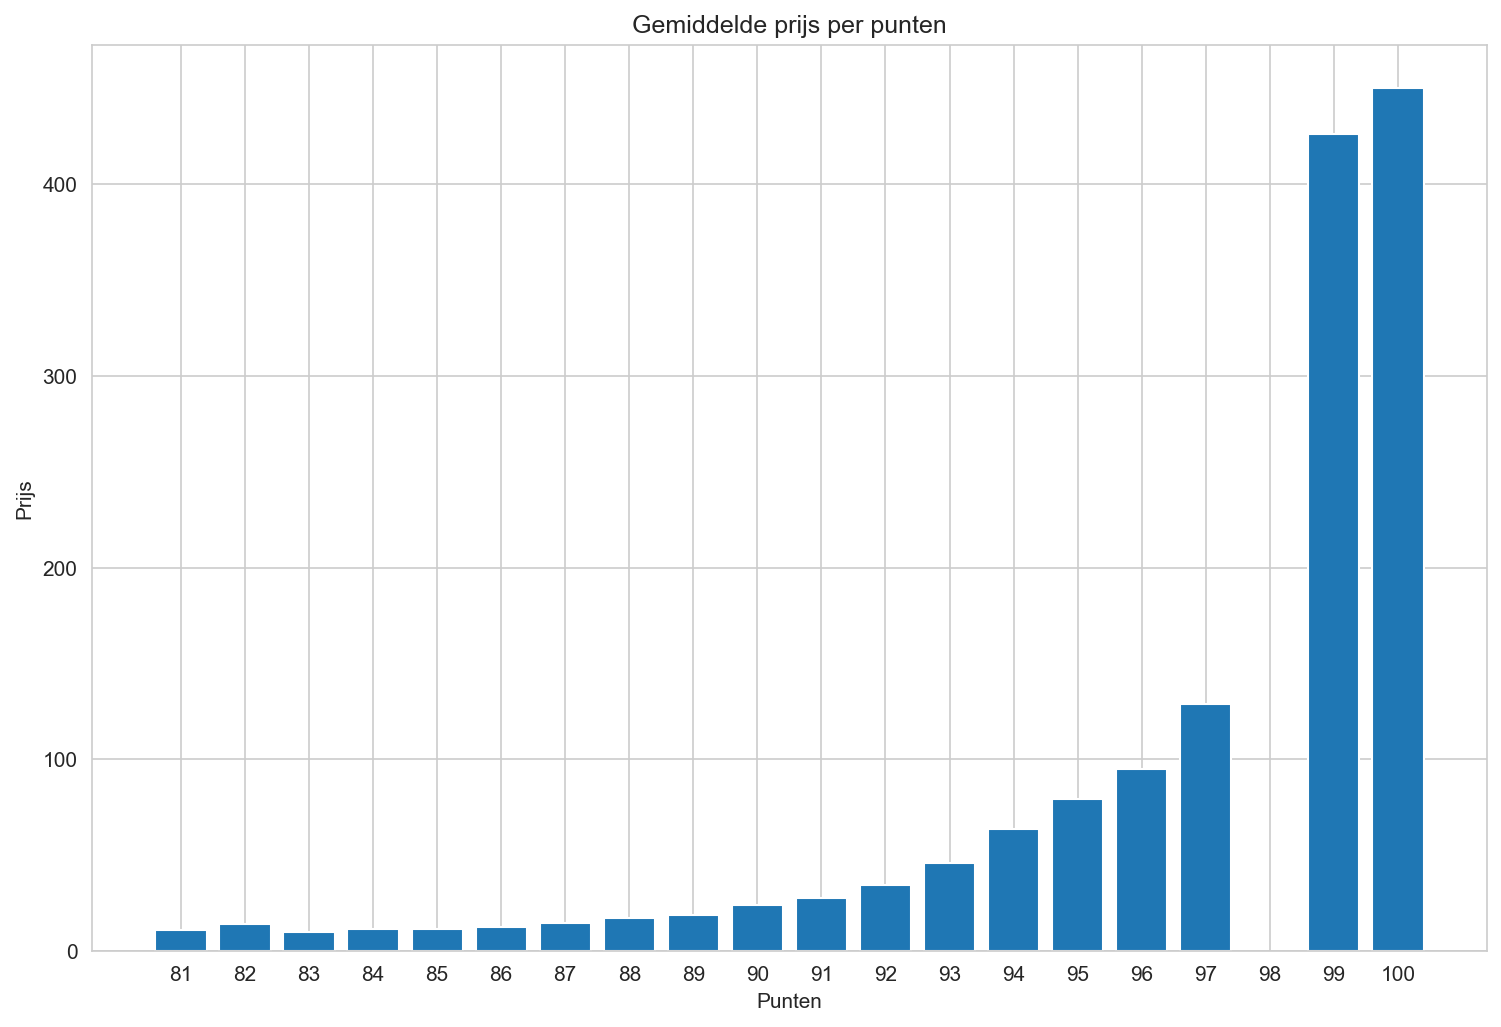

In [65]:
data = df_red_wine_deviated[['points','price']]
data = data.groupby('points').mean()

fix, ax = plt.subplots(figsize=(12,8), dpi=150)

ax.bar(data.index, data['price'])
plt.xticks([n for n in range(81, 101, 1)])
plt.title("Gemiddelde prijs per punten")
plt.ylabel('Prijs');
plt.xlabel('Punten');
plt.show()

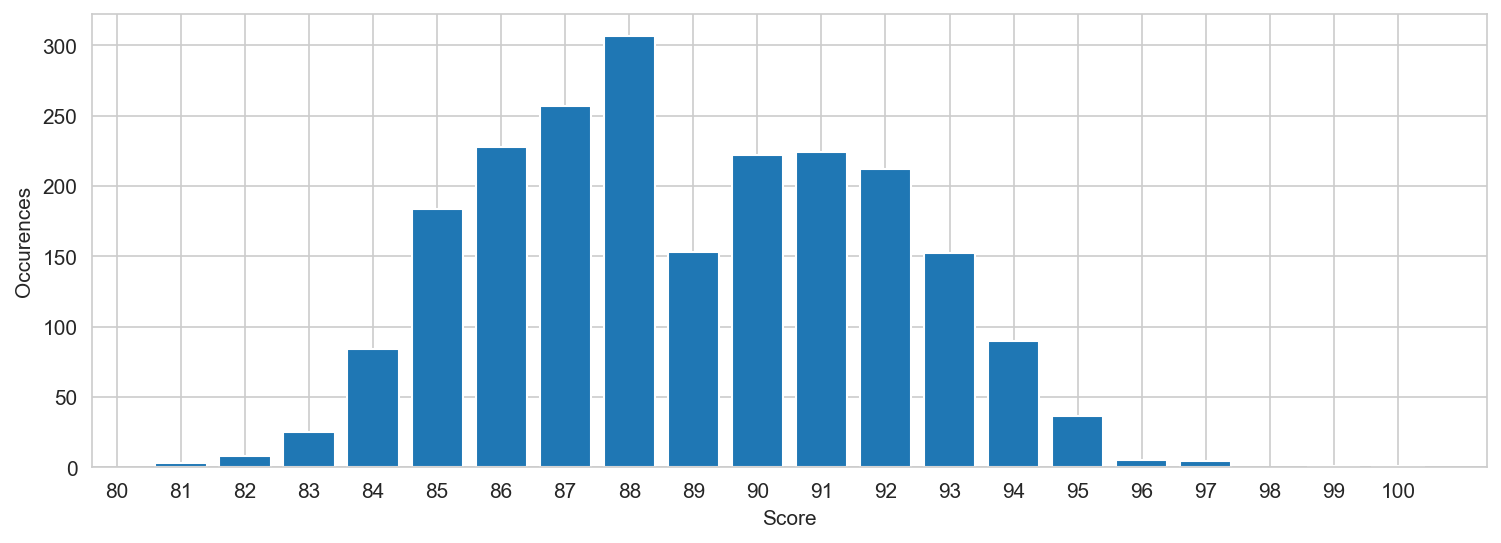

In [78]:
data = df_red_wine_deviated['points'].value_counts().sort_index()

fix, ax = plt.subplots(figsize=(12,4), dpi=150)

ax.bar(data.index, data)
plt.xticks([n for n in range(80, 101, 1)])
plt.ylabel('Occurences');
plt.xlabel('Score');
plt.title("Aantal wijnen per score")
plt.show()

In [77]:
import scipy.stats as stats
print(stats.pearsonr(df_red_wine['price'],df_red_wine['points']))
print(stats.pearsonr(df_red_wine_deviated['price'],df_red_wine_deviated['points']))

(0.5864855798095838, 4.278829209794213e-203)
(0.5854339686377066, 3.3593137793624305e-202)


# Conclusie
Er is een duidelijk verband tussen prijs en score (0.59)